In [1]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [3]:
head(airbnb)

Zipcode Neighbourhood.Cleansed Property.Type Room.Type       Accommodates
1 28004   Universidad            Apartment     Private room    2           
2 28004   Universidad            Apartment     Entire home/apt 6           
3 28004   Universidad            Apartment     Entire home/apt 3           
4 28004   Universidad            Loft          Entire home/apt 3           
5 28015   Universidad            Apartment     Entire home/apt 5           
6 28004   Universidad            Apartment     Entire home/apt 2           
  Bathrooms Bedrooms Beds Bed.Type
1 2         1        1    Real Bed
2 1         3        5    Real Bed
3 1         2        2    Real Bed
4 2         1        1    Real Bed
5 1         1        1    Real Bed
6 1         0        1    Real Bed
  Amenities                                                                                                                                                                                                                                                                                                                                                       
1 TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron                                                                                                                                                                             
2 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo                                                                                                                                                                                     
3 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                          
4 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                          
5 TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron                                                                                                                                                                                                              
6 TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry
  Square.Feet Price Review.Scores.Rating
1  NA         35     NA                 
2  NA         92     96                 
3  NA         55     91                 
4  NA         60    100                 
5 538         75     90                 
6  NA         55     95

Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

oldNames = colnames(airbnb)
oldNamesLength = length(oldNames)
for (i in 1:oldNamesLength){  
    colnames(airbnb)[colnames(airbnb) == oldNames[i]] <- newnames[i]
}
head(airbnb)


CodigoPostal Barrio      TipoPropiedad TipoAlquiler    MaxOcupantes NumBanyos
1 28004        Universidad Apartment     Private room    2            2        
2 28004        Universidad Apartment     Entire home/apt 6            1        
3 28004        Universidad Apartment     Entire home/apt 3            1        
4 28004        Universidad Loft          Entire home/apt 3            2        
5 28015        Universidad Apartment     Entire home/apt 5            1        
6 28004        Universidad Apartment     Entire home/apt 2            1        
  NumDormitorios NumCamas TipoCama
1 1              1        Real Bed
2 3              5        Real Bed
3 2              2        Real Bed
4 1              1        Real Bed
5 1              1        Real Bed
6 0              1        Real Bed
  Comodidades                                                                                                                                                                                                                                                                                                                                                     
1 TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron                                                                                                                                                                             
2 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo                                                                                                                                                                                     
3 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                          
4 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                          
5 TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron                                                                                                                                                                                                              
6 TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry
  PiesCuadrados Precio Puntuacion
1  NA           35      NA       
2  NA           92      96       
3  NA           55      91       
4  NA           60     100       
5 538           75      90       
6  NA           55      95

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [5]:
pieAmetros = 0.092903
airbnb$MetrosCuadrados <- as.numeric(airbnb$PiesCuadrados) * pieAmetros
head(airbnb)

CodigoPostal Barrio      TipoPropiedad TipoAlquiler    MaxOcupantes NumBanyos
1 28004        Universidad Apartment     Private room    2            2        
2 28004        Universidad Apartment     Entire home/apt 6            1        
3 28004        Universidad Apartment     Entire home/apt 3            1        
4 28004        Universidad Loft          Entire home/apt 3            2        
5 28015        Universidad Apartment     Entire home/apt 5            1        
6 28004        Universidad Apartment     Entire home/apt 2            1        
  NumDormitorios NumCamas TipoCama
1 1              1        Real Bed
2 3              5        Real Bed
3 2              2        Real Bed
4 1              1        Real Bed
5 1              1        Real Bed
6 0              1        Real Bed
  Comodidades                                                                                                                                                                                                                                                                                                                                                     
1 TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron                                                                                                                                                                             
2 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo                                                                                                                                                                                     
3 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                          
4 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                          
5 TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron                                                                                                                                                                                                              
6 TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry
  PiesCuadrados Precio Puntuacion MetrosCuadrados
1  NA           35      NA              NA       
2  NA           92      96              NA       
3  NA           55      91              NA       
4  NA           60     100              NA       
5 538           75      90        49.98181       
6  NA           55      95              NA

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [8]:
airbnb$CodigoPostal[substr(airbnb$CodigoPostal, start = 6, stop = 6)  == "\n"  ] <- substr(airbnb$CodigoPostal, start = 1, stop = 5) 
airbnb$CodigoPostal[airbnb$CodigoPostal == "" ] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == "-" ] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == "28" ] <- NA
airbnb$CodigoPostal[substr(airbnb$CodigoPostal, start = 1, stop = 2)  != "28" ] <- NA

airbnb$CodigoPostal[airbnb$CodigoPostal == "2804" ] <- 28004
airbnb$CodigoPostal[airbnb$CodigoPostal == "2805" ] <- 28005
airbnb$CodigoPostal[airbnb$CodigoPostal == "2815" ] <- 28015

#sum(airbnb$CodigoPostal== "" , na.rm=T)
#sum(airbnb$CodigoPostal== "-" , na.rm=T)
#sum(airbnb$CodigoPostal== "28" , na.rm=T)
#sum(airbnb$CodigoPostal== "" , na.rm=T)
#sum(airbnb$CodigoPostal== "-" , na.rm=T)
#sum(airbnb$CodigoPostal== "28" , na.rm=T)
#sum(airbnb$CodigoPostal== "28" , na.rm=T)
#sum(substr(airbnb$CodigoPostal, start = 1, stop = 2)  != "28"  , na.rm=T)
#sum(substr(airbnb$CodigoPostal, start = 6, stop = 6)  == "\n"  , na.rm=T)

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [26] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [51] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [76] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[101] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[126] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[151] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[176] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[201] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[226] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[251] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[276] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[301] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[326] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[351] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[376] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[401] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[426] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [9]:

print("Tenemos los siguientes codigos postales : ")
unique(airbnb$CodigoPostal)


[1] "Tenemos los siguientes codigos postales : "


[1] "28004"  "28015"  "28013"  "28005"  "28012"  "28014"  "28045"  NA      
 [9] "28007"  "28028"  "28009"  "28001"  "28006"  "28010"  "28002"  "28034" 
[17] "28050"  "28008"  "28011"  "28049"  "28038"  "28053"  "28047"  "28025" 
[25] "28019"  "28024"  "28016"  "28036"  "28046"  "28039"  "28020"  "28003" 
[33] "28029"  "28054"  "28041"  "28026"  "28058"  "28018"  "28030"  "28017" 
[41] "28027"  "28043"  "28033"  "28055"  "28021"  "28032"  "28037"  "28022" 
[49] "28042"  "28094"  "280013" "28035"  "28040"  "28031"  "28044"  "28105" 
[57] "28023"  "28051"  "28850"  "28048"  "28056"  "28060"  "28052"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [10]:
tableCodigoPostal = table(airbnb$CodigoPostal)
print("Los 5 con mas entradas son los siguientes:")
head(sort(tableCodigoPostal,decreasing = T),5)

print("Los 5 con menos entradas son los siguientes:")
head(sort(tableCodigoPostal,decreasing = F),5)

[1] "Los 5 con mas entradas son los siguientes:"



28012 28004 28005 28013 28014 
 2060  1797  1195  1019   630 

[1] "Los 5 con menos entradas son los siguientes:"



280013  28048  28052  28056  28058 
     1      1      1      1      1 

¿Cuales son los barrios que hay en el código postal 28012?

In [11]:
barrios28012 = airbnb$Barrio[which(airbnb$CodigoPostal == 28012) ] 
unique(barrios28012)


[1] "Sol"             "Acacias"         "Palos de Moguer" "Embajadores"    
 [5] "Cortes"          "Palacio"         "Universidad"     "Delicias"       
 [9] "Arapiles"        "Atocha"          "Goya"

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [12]:
tableEntradaBarrio28012 = table(barrios28012)
tableEntradaBarrio28012

barrios28012
        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [14]:
uniqueBarrios = unique(airbnb$Barrio)


paste("Tenemos un total de " , length(uniqueBarrios) , " barrios")
print("Estos son : ")
uniqueBarrios

[1] "Tenemos un total de  125  barrios"

[1] "Estos son : "


[1] "Universidad"                  "Sol"                         
  [3] "Imperial"                     "Acacias"                     
  [5] "Chopera"                      "Delicias"                    
  [7] "Palos de Moguer"              "Embajadores"                 
  [9] "Cortes"                       "Atocha"                      
 [11] "Pacífico"                     "Adelfas"                     
 [13] "Estrella"                     "Ibiza"                       
 [15] "Jerónimos"                    "Niño Jesús"                  
 [17] "Palacio"                      "Justicia"                    
 [19] "Recoletos"                    "Goya"                        
 [21] "Fuente del Berro"             "Arapiles"                    
 [23] "Trafalgar"                    "Almagro"                     
 [25] "Guindalera"                   "Lista"                       
 [27] "Castellana"                   "El Viso"                     
 [29] "Prosperidad"                  "Valverde"                    
 [31] "Casa de Campo"                "El Goloso"                   
 [33] "Numancia"                     "Cármenes"                    
 [35] "Puerta del Angel"             "Lucero"                      
 [37] "Aluche"                       "San Isidro"                  
 [39] "Campamento"                   "Comillas"                    
 [41] "Opañel"                       "Vista Alegre"                
 [43] "Ciudad Jardín"                "Hispanoamérica"              
 [45] "Nueva España"                 "Castilla"                    
 [47] "Bellas Vistas"                "Cuatro Caminos"              
 [49] "Castillejos"                  "Vallehermoso"                
 [51] "Almenara"                     "Valdeacederas"               
 [53] "Berruguete"                   "Gaztambide"                  
 [55] "Rios Rosas"                   "Peñagrande"                  
 [57] "Argüelles"                    "Puerta Bonita"               
 [59] "Buenavista"                   "Abrantes"                    
 [61] "Orcasur"                      "San Fermín"                  
 [63] "Almendrales"                  "Pradolongo"                  
 [65] "Portazgo"                     "Entrevías"                   
 [67] "San Diego"                    "Palomeras Bajas"             
 [69] "Fontarrón"                    "Vinateros"                   
 [71] "Ventas"                       "Pueblo Nuevo"                
 [73] "Quintana"                     "Concepción"                  
 [75] "San Juan Bautista"            "Costillares"                 
 [77] "Piovera"                      "Canillas"                    
 [79] "Pinar del Rey"                "Apostol Santiago"            
 [81] "San Andrés"                   "Valdefuentes"                
 [83] "Butarque"                     "Los Angeles"                 
 [85] "Casco Histórico de Vicálvaro" "Simancas"                    
 [87] "Rejas"                        "Salvador"                    
 [89] "Casco Histórico de Barajas"   "Pilar"                       
 [91] "La Paz"                       "Mirasierra"                  
 [93] "Ciudad Universitaria"         "Moscardó"                    
 [95] "Palomeras Sureste"            "Marroquina"                  
 [97] "Media Legua"                  "Los Rosales"                 
 [99] "Casco Histórico de Vallecas"  "Timón"                       
[101] "Corralejos"                   "Cuatro Vientos"              
[103] "Colina"                       "San Cristobal"               
[105] "Alameda de Osuna"             "Aeropuerto"                  
[107] "Palomas"                      "Zofío"                       
[109] "Aguilas"                      "Legazpi"                     
[111] "Fuentelareina"                "Aravaca"                     
[113] "Ambroz"                       "Canillejas"                  
[115] "Valdezarza"                   "Amposta"                     
[117] "San Pascual"                  "Santa Eugenia"      

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [15]:
tableBarrios = table(airbnb$Barrio)
print("Los 5 barrios con mas entradas son los siguientes:")
head(sort(tableBarrios,decreasing = T),5)


[1] "Los 5 barrios con mas entradas son los siguientes:"



Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [16]:
uniqueTiposAlquiler = unique(airbnb$TipoAlquiler)
tableTiposAlquiler = table(airbnb$TipoAlquiler)
paste("Tenemos un total de " , length(uniqueTiposAlquiler) , " tipos de alquiler")
print("Estos son : ")
tableTiposAlquiler

[1] "Tenemos un total de  3  tipos de alquiler"

[1] "Estos son : "



Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


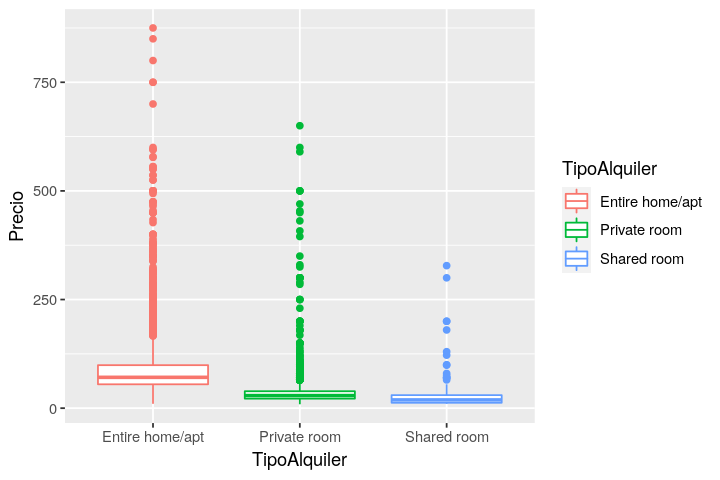

In [17]:
library(ggplot2)
ggplot(airbnb,aes(y=Precio,x=TipoAlquiler,color=TipoAlquiler))+geom_boxplot()

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [216]:
for (tipo in levels(airbnb$TipoAlquiler)){
    df<-subset(airbnb,TipoAlquiler==tipo)
    print(paste("Precio medio tipo",tipo," = ",mean(df$Precio,na.rm=T)))
    if (nrow(df)>5000){
        df<-df[1:5000,]
    }
    sp<-shapiro.test(df$Precio)
    print(paste(" - Test shapiro pvalor = ",sp$p.value))
}

#Como realizamos un test de kruskal
kt<-kruskal.test(Precio~TipoAlquiler,airbnb)
kt
print("Las medias son diferentes ya que el p-value es muy bajo < 2.2e-16 ")


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


[1] "Las medias son diferentes ya que el p-value es muy bajo < 2.2e-16 "


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [18]:
airbnb_entire<-subset(airbnb,TipoAlquiler=='Entire home/apt')

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [19]:
tableEntireApto = table(airbnb_entire$Barrio)

print("Los 5 barrios con mayor numero de apartamentos son : ")
head(sort(tableEntireApto,decreasing = T),5)

[1] "Los 5 barrios con mayor numero de apartamentos son : "



Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [50]:
precioPromedioAlquilerAptEnteros<-aggregate(. ~ Barrio, airbnb_entire[c("Barrio","Precio")], mean,na.rm=TRUE)
pPromAlquiDesc <-precioPromedioAlquilerAptEnteros[order(precioPromedioAlquilerAptEnteros$Precio,decreasing = T),]
colnames(pPromAlquiDesc)<-c("Barrio","Precio Promedio")
print("A continuacion se presentan los 5 barrios con mayor precio promedio y su respectivo valor")
head(pPromAlquiDesc,5)


[1] "A continuacion se presentan los 5 barrios con mayor precio promedio y su respectivo valor"


Barrio        Precio Promedio
77 Palomas       309.7500       
50 Fuentelareina 180.0000       
93 Recoletos     161.9254       
43 El Plantío    150.0000       
30 Castellana    141.3889

¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [73]:


cantidadAptosXBarrio = data.frame(table(airbnb_entire$Barrio))
colnames(cantidadAptosXBarrio)<-c("Barrio","Total de Aptos")
aptosXPrecioProm = merge(cantidadAptosXBarrio,precioPromedioAlquilerAptEnteros,by="Barrio")
aptosXPrecioPromDes <-aptosXPrecioProm[order(aptosXPrecioProm$Precio,decreasing = T),]
colnames(aptosXPrecioPromDes)<-c("Barrio","Total de Aptos", "Precio Promedio")

print("A continuacion se detallan la cantidad de aptos con su precio promedio por barrio")
aptosXPrecioPromDes
#-- Fisrt 5 just below
#head(aptosXPrecioPromDes,5)

[1] "A continuacion se detallan la cantidad de aptos con su precio promedio por barrio"


Barrio                     Total de Aptos Precio Promedio
77  Palomas                      4            309.75000      
50  Fuentelareina                2            180.00000      
93  Recoletos                  135            161.92537      
43  El Plantío                   1            150.00000      
30  Castellana                  73            141.38889      
27  Casco Histórico de Barajas   8            141.25000      
6   Alameda de Osuna             4            138.75000      
35  Ciudad Universitaria        13            138.30769      
58  Jerónimos                   62            131.82258      
82  Peñagrande                  11            127.63636      
71  Nueva España                42            127.30952      
52  Goya                       142            111.33803      
7   Almagro                     97            109.18557      
23  Canillas                    15            105.80000      
55  Hispanoamérica              52            104.44231      
56  Ibiza                       64            102.62500      
117 Vinateros                    2            102.50000      
68  Mirasierra                   7            101.28571      
106 Sol                        701            100.75036      
15  Arcos                        4            100.50000      
26  Casa de Campo               41             98.85366      
108 Trafalgar                  223             98.57848      
59  Justicia                   534             98.25468      
12  Apostol Santiago             5             96.60000      
40  Costillares                 13             95.07692      
39  Cortes                     574             94.39373      
76  Palacio                    769             93.30599      
47  Estrella                     3             92.66667      
114 Vallehermoso                33             92.39394      
24  Canillejas                   3             91.66667      
⋮   ⋮                          ⋮              ⋮              
20  Buenavista                 12             57.91667       
105 Simancas                   21             57.14286       
37  Comillas                   21             56.66667       
98  San Cristobal               2             56.50000       
46  Entrevías                   4             56.25000       
69  Moscardó                   18             56.05556       
10  Aluche                      9             55.88889       
33  Chopera                    34             55.02941       
86  Portazgo                    1             55.00000       
5   Aguilas                     2             54.50000       
19  Berruguete                 35             53.85714       
113 Valdezarza                  3             53.33333       
48  Fontarrón                   5             51.80000       
18  Bellas Vistas              45             51.77778       
73  Opañel                     10             51.60000       
97  San Andrés                 12             50.91667       
116 Ventas                     26             50.03846       
66  Marroquina                  2             50.00000       
81  Pavones                     1             48.00000       
119 Zofío                       4             48.00000       
104 Santa Eugenia               2             47.00000       
1   Abrantes                    3             46.00000       
22  Campamento                  9             45.55556       
74  Orcasur                     1             45.00000       
99  San Diego                  32             44.34375       
21  Butarque                    1             42.00000       
54  Hellín                      1             42.00000       
4   Aeropuerto                  2             38.00000       
11  Ambroz                      2             34.50000       
79  Palomeras Sureste           4             31.50000

Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [110]:
colnames(aptosXPrecioPromDes)<-c("Barrio","Total", "Precio Promedio")
barriosPrecMasDe100 = subset(aptosXPrecioPromDes,aptosXPrecioPromDes$Total>100)
colnames(barriosPrecMasDe100)<-c("Barrio","Total de Aptos", "Precio Promedio")

print("A continuacion se detallan los 5 barrios con mayor precio y mas de 100 aptos en alquiler")
head(barriosPrecMasDe100,5)



[1] "A continuacion se detallan los 5 barrios con mayor precio y mas de 100 aptos en alquiler"


Barrio    Total de Aptos Precio Promedio
93  Recoletos 135            161.92537      
52  Goya      142            111.33803      
106 Sol       701            100.75036      
108 Trafalgar 223             98.57848      
59  Justicia  534             98.25468

Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

[1] "Diagrama de Densidad"


Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


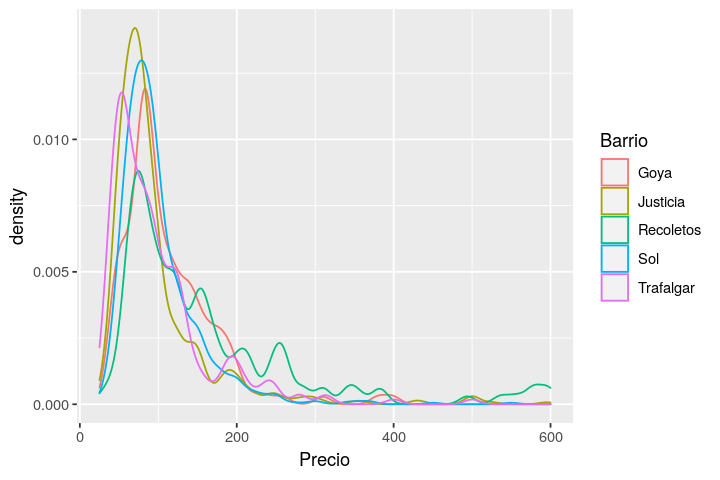

In [113]:
barriosADibujar = head(barriosPrecMasDe100,5)$Barrio
dataSetBarriosDibujar = subset(airbnb_entire,Barrio %in% barriosADibujar)

print("Diagrama de Densidad X Barrios")
ggplot(dataSetBarriosDibujar,aes(x=Precio,color=Barrio))+geom_density(bw=10)

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [91]:
tamanioMedio = aggregate(. ~ Barrio, airbnb_entire[c("Barrio","MetrosCuadrados")], mean,na.rm=TRUE)
tamanioMedioMasDe100<-merge(barriosPrecMasDe100,tamanioMedio,by="Barrio")
precioPromedioMasDe100<-tamanioMedioMasDe100[order(tamanioMedioMasDe100$Precio,decreasing = T),]
colnames(precioPromedioMasDe100)<-c("Barrio","Total de Aptos", "Precio Promedio", "Tamaño Promedio en metros²")

print("A continuacion se pueden observar los 5 barrios anteriores mas su tamaño en metros cuadrados")

head(precioPromedioMasDe100,5)

[1] "A continuaacion se pueden observar los 5 barrios anteriores mas su tamaño en metros cuadrados"


Barrio    Total de Aptos Precio Promedio Tamaño Promedio en metros²
8  Recoletos 135            161.92537       26.66316                  
4  Goya      142            111.33803       51.68504                  
9  Sol       701            100.75036       45.61692                  
10 Trafalgar 223             98.57848       29.30426                  
5  Justicia  534             98.25468       28.52669

Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

[1] "Diagrama de Densidad X Tamaño"


Warning message:
“Removed 1645 rows containing non-finite values (stat_density).”


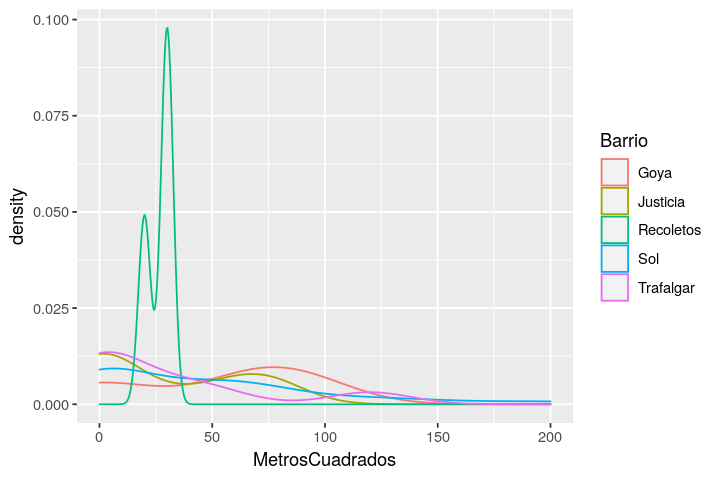

In [227]:
print("Diagrama de Densidad X Tamaño")
dataSetTamanioDibujar = subset(airbnb_entire,Barrio %in% barriosADibujar)
ggplot(dataSetTamanioDibujar,aes(x=MetrosCuadrados,color=Barrio))+geom_density()



Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [228]:
for (barrio in unique(dataSetTamanioDibujar$Barrio)){
    df = top_barrios[which(top_barrios$Barrio==as.character(barrio)),]
    print(paste("Precio medio barrio",barrio,"=",mean(df$MetrosCuadrados,na.rm=T)))
    if (nrow(df)>5000){
        df<-df[1:5000,]
    }
    sp = shapiro.test(df$Precio)
    print(paste(" - Test shapiro pvalor = ",sp$p.value))
}

kt = kruskal.test(MetrosCuadrados~Barrio,top_barrios)
kt
paste("No podemos determinar que los tamaños son esatdisticamente diferentes, el pvalor de la prueba es muy alto p-value = 0.7574")



[1] "Precio medio barrio Sol = 45.6169213833333"
[1] " - Test shapiro pvalor =  6.82296081876145e-30"
[1] "Precio medio barrio Justicia = 28.5266858823529"
[1] " - Test shapiro pvalor =  6.68576869862315e-32"
[1] "Precio medio barrio Recoletos = 26.663161"
[1] " - Test shapiro pvalor =  2.80034621674868e-13"
[1] "Precio medio barrio Goya = 51.6850356666667"
[1] " - Test shapiro pvalor =  2.76797989326578e-11"
[1] "Precio medio barrio Trafalgar = 29.3042605714286"
[1] " - Test shapiro pvalor =  5.98924729847284e-17"



	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


[1] "No podemos determinar que los tamaños son esatdisticamente diferentes, el pvalor de la prueba es muy alto p-value = 0.7574"

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [147]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
head(barrio_sol,0)

CodigoPostal Barrio TipoPropiedad TipoAlquiler MaxOcupantes NumBanyos
     NumDormitorios NumCamas TipoCama Comodidades PiesCuadrados Precio
     Puntuacion MetrosCuadrados

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [148]:
cor(barrio_sol[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")],use="pairwise.complete.obs")

NumBanyos NumDormitorios MaxOcupantes MetrosCuadrados
NumBanyos       1.0000000 0.6761906      0.6578162    0.4820549      
NumDormitorios  0.6761906 1.0000000      0.7594598    0.5684521      
MaxOcupantes    0.6578162 0.7594598      1.0000000    0.4286233      
MetrosCuadrados 0.4820549 0.5684521      0.4286233    1.0000000

Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


In [189]:
#ggplot(barrio_sol,aes(x=MetrosCuadrados))+geom_density(bw=4)
barrio_sol1<-subset(barrio_sol, MetrosCuadrados >= 10)
#ggplot(barrio_sol1,aes(x=MetrosCuadrados))+geom_density(bw=4)
#ggplot(barrio_sol1,aes(x=NumDormitorios))+geom_density(bw=1)
barrio_sol2<-subset(barrio_sol1, NumDormitorios >= 1)
#ggplot(barrio_sol2,aes(x=NumDormitorios))+geom_density(bw=1)
#ggplot(barrio_sol2,aes(x=NumBanyos))+geom_density(bw=1)
#ggplot(barrio_sol2,aes(x=MaxOcupantes))+geom_density(bw=1)
#barrio_sol2$fNumDormitorios<-factor(barrio_sol$NumDormitorios)
#print("Metros Cuadrados")
#table(barrio_sol2$MetrosCuadrados)
#print("Dormitorios")
#table(barrio_sol2$NumDormitorios)
#print("Baños")
#table(barrio_sol2$NumBanyos)
#print("Ocupantes")
#table(barrio_sol2$MaxOcupantes)
# Subset limpio---------------------
barrio_solAUsar<-subset(airbnb_entire,Barrio=="Sol" & MetrosCuadrados>10 & NumDormitorios >= 1)

cor(barrio_solAUsar[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")],use="pairwise.complete.obs")

NumBanyos NumDormitorios MaxOcupantes MetrosCuadrados
NumBanyos       1.0000000 0.7337699      0.8579905    0.5928876      
NumDormitorios  0.7337699 1.0000000      0.7827712    0.8163771      
MaxOcupantes    0.8579905 0.7827712      1.0000000    0.6957651      
MetrosCuadrados 0.5928876 0.8163771      0.6957651    1.0000000

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [193]:
calculo1 = lm(barrio_solAUsar,formula=Precio~NumBanyos+NumDormitorios+MetrosCuadrados+MaxOcupantes)

calculo2 = lm(barrio_solAUsar,formula=Precio~NumDormitorios)
calculo3 = lm(barrio_solAUsar,formula=Precio~MetrosCuadrados)
calculo4 = lm(barrio_solAUsar,formula=Precio~MetrosCuadrados+NumDormitorios)
print("------Calculo 1 todas las variables-------")
summary(calculo1)
print("------Calculo 2 numero de dormitorios-------")
summary(calculo2)
print("------Calculo 3 metros cuadrados-------")
summary(calculo3)
print("------Calculo 4 metros cuadrados y numeros de dormitorios-------")
summary(calculo3)


[1] "------Calculo 1 todas las variables-------"



Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MetrosCuadrados + 
    MaxOcupantes, data = barrio_solAUsar)

Residuals:
    Min      1Q  Median      3Q     Max 
-85.042 -13.252  -2.146  19.666  60.825 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      24.0964    13.8767   1.736  0.09432 . 
NumBanyos        -2.3020    15.6011  -0.148  0.88383   
NumDormitorios   32.5218    10.1108   3.217  0.00346 **
MetrosCuadrados   0.1999     0.2200   0.909  0.37189   
MaxOcupantes      2.7079     4.7448   0.571  0.57311   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.59 on 26 degrees of freedom
Multiple R-squared:  0.7534,	Adjusted R-squared:  0.7155 
F-statistic: 19.86 on 4 and 26 DF,  p-value: 1.346e-07


[1] "------Calculo 2 numero de dormitorios-------"



Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_solAUsar)

Residuals:
    Min      1Q  Median      3Q     Max 
-97.118 -17.180  -0.534  23.143  53.882 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      32.888     10.500   3.132  0.00394 ** 
NumDormitorios   42.646      4.711   9.052 6.01e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.77 on 29 degrees of freedom
Multiple R-squared:  0.7386,	Adjusted R-squared:  0.7296 
F-statistic: 81.94 on 1 and 29 DF,  p-value: 6.01e-10


[1] "------Calculo 3 metros cuadrados-------"



Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_solAUsar)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.894 -19.902  -1.230   8.741 121.549 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      33.3289    14.4874   2.301   0.0288 *  
MetrosCuadrados   0.9672     0.1530   6.323  6.6e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.3 on 29 degrees of freedom
Multiple R-squared:  0.5796,	Adjusted R-squared:  0.5651 
F-statistic: 39.97 on 1 and 29 DF,  p-value: 6.601e-07


[1] "------Calculo 4 metros cuadrados y numeros de dormitorios-------"



Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_solAUsar)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.894 -19.902  -1.230   8.741 121.549 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      33.3289    14.4874   2.301   0.0288 *  
MetrosCuadrados   0.9672     0.1530   6.323  6.6e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.3 on 29 degrees of freedom
Multiple R-squared:  0.5796,	Adjusted R-squared:  0.5651 
F-statistic: 39.97 on 1 and 29 DF,  p-value: 6.601e-07


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [194]:
print("La variable mas fiable para conocer el precio de un inmueble es el numero de dormitorios(calculo2), en el calculo 3 y 4 podemos observar que la correlacion entre ambas variables es tal que el Multiple R-squared: es similar por lo que no ayuda")

[1] "La variable mas fiable para conocer el precio de un inmueble es el numero de dormitorios, en el calculo 3 y 4 podemos observar que la correlacion entre ambas variables es tal que el Multiple R-squared: es similar"


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [196]:
confint(calculo3)["MetrosCuadrados",]
print("Se incrementan aproximadamente 1.28 euros por metro cuadrado")

2.5 %    97.5 % 
0.6543517 1.2801215

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [212]:
confint(calculo2)["NumDormitorios",]
print("Se incrementan aproximadamente 52.28 euros por habitacion")

2.5 %   97.5 % 
33.01073 52.28146

[1] "Se incrementan aproximadamente 52.28 euros por habitacion"


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [211]:
apto3Hab =sum(barrio_sol$NumDormitorios == 3)
totalBarrioSol = nrow(barrio_sol)
print(paste("La probabilidad de encontrar un apto de 3 habitaciones es de:", apto3Hab/totalBarrioSol ,"%"))
print("El margen de error es de:")
1 - binom.test(num3dormitorios,numTotal)$conf

[1] "La probabilidad de encontrar un apto de 3 habitaciones es de: 0.0784593437945792 %"
[1] "El margen de error es de:"


[1] 0.9403494 0.8990967
attr(,"conf.level")
[1] 0.95